# TP de synthese d'image

#### B-spline
#### Etudiant : Noe Marzat

In [37]:
import matplotlib.pyplot as plt
import numpy as np

Fonctions codées pour le TP

In [38]:
def generate_nodal_vector(vector_type, order, number_of_points):
    match vector_type:
        case "uniform":
            return list(range(order + number_of_points + 1))
        case "open_uniform":
            return [1] * order + list(range(2, number_of_points + 1 - order + 2)) + [number_of_points + 1 - order + 2] * order

In [39]:
def gen_spline_point(control_points, k, U, u):

    # Etape 1
    dec = 0
    while u > U[dec + k]:
        dec += 1
    spline_points = control_points[dec:dec+k]

    # Etape 2
    for row in range(k - 1):
        new_spline_points = []
        for col in range(k - row - 1):
            i1 = U[dec + col + row + 1]
            i2 = U[dec + col + k]
            p = ((i2 - u) * spline_points[col] + (u - i1) * spline_points[col + 1]) / (i2 - i1)
            new_spline_points.append(p)
        spline_points = new_spline_points

    return spline_points[0]

def b_spline(control_points, order, nodal_vector_type):
    nb_control_points = len(control_points) - 1
    nodal_vector = generate_nodal_vector(nodal_vector_type, order, nb_control_points)

    u = np.linspace(nodal_vector[order-1], nodal_vector[nb_control_points+1], 1000)

    return np.array([ gen_spline_point(control_points, order, nodal_vector, _u) for _u in u ])

def draw_b_spline(control_points, b_spline_points):
    plt.plot(control_points[:, 0], control_points[:, 1], c='b')  
    plt.plot(b_spline_points[:, 0], b_spline_points[:, 1], c='r')
    plt.show()

## Question 1 :

Les étudiants doivent implémenter l'algorithme de floraison (Cox - De Boor) pour l'évaluation d'un point sur une B-Spline et le tester sur une courbe simple (ordre k=3, avec 4 ou 5 points de contrôle et un vecteur nodal uniforme).

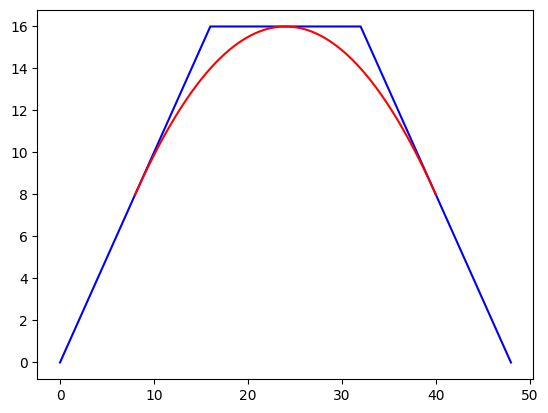

In [40]:
# Forme Simple (4 points, k=3)
points_control = np.array([(0,0),(16,16),(32,16),(48,0)])
draw_b_spline(points_control, b_spline(points_control, order = 3, nodal_vector_type="uniform"))


## Question 2 :

Une fois fait, ils expérimentent le tracé de courbes avec des B-Splines sur le tracé complexe utilisé pour la courbe de Bézier, avec différents ordres (k=2,3,4) et un vecteur nodal uniforme puis ouvert uniforme. Ils expérimenteront ensuite librement les courbes B-splines avec différents vecteurs nodaux (uniforme, ouvert uniforme, quelconque), différents ordres et différentes formes (ouverte, fermée, etc).

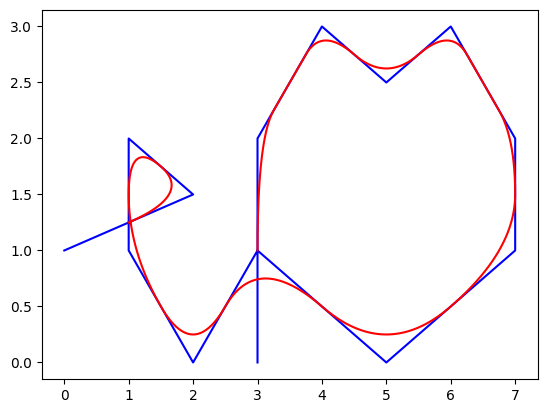

In [41]:
# Forme Complexe (16 points, k=3, vecteur uniforme)
points_control = np.array([(3,0),(3,2),(3.5,2.5),(4,3),(5,2.5),(6,3),(6.5,2.5),(7,2),(7,1),(5,0),(3,1),(2,0),(1,1),(1,2),(2,1.5),(0,1)])

b_spline_points = b_spline(points_control, order = 3, nodal_vector_type="uniform")
draw_b_spline(points_control, b_spline_points)

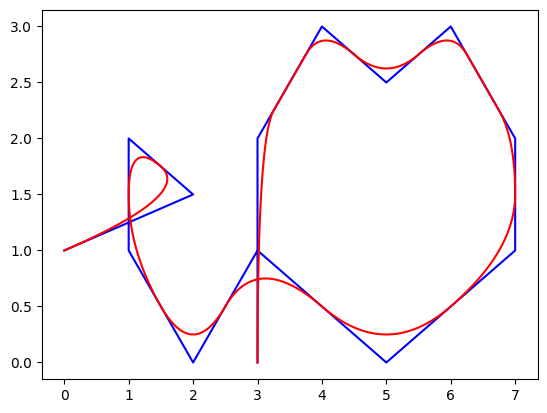

In [42]:
# Forme Complexe (16 points, k=3, vecteur ouvert uniforme)
points_control = np.array([(3,0),(3,2),(3.5,2.5),(4,3),(5,2.5),(6,3),(6.5,2.5),(7,2),(7,1),(5,0),(3,1),(2,0),(1,1),(1,2),(2,1.5),(0,1)])

b_spline_points = b_spline(points_control, order = 3, nodal_vector_type="open_uniform")
draw_b_spline(points_control, b_spline_points)

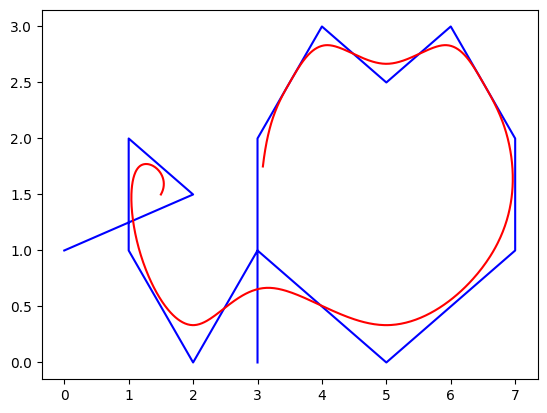

In [43]:
# Forme Complexe (16 points, k=4, vecteur uniforme)
points_control = np.array([(3,0),(3,2),(3.5,2.5),(4,3),(5,2.5),(6,3),(6.5,2.5),(7,2),(7,1),(5,0),(3,1),(2,0),(1,1),(1,2),(2,1.5),(0,1)])

b_spline_points = b_spline(points_control, order = 4, nodal_vector_type="uniform")
draw_b_spline(points_control, b_spline_points)

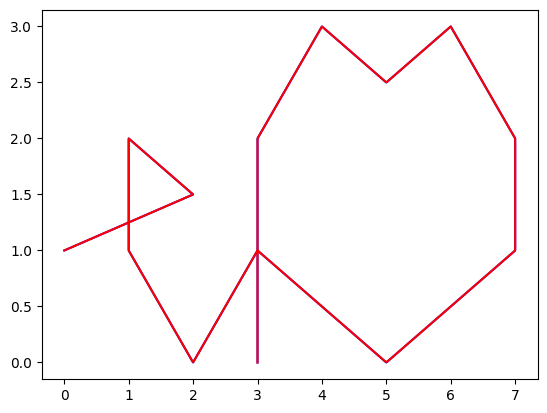

In [44]:
# Forme Complexe (16 points, k=2, vecteur uniforme)
points_control = np.array([(3,0),(3,2),(3.5,2.5),(4,3),(5,2.5),(6,3),(6.5,2.5),(7,2),(7,1),(5,0),(3,1),(2,0),(1,1),(1,2),(2,1.5),(0,1)])

b_spline_points = b_spline(points_control, order = 2, nodal_vector_type="uniform")
draw_b_spline(points_control, b_spline_points)

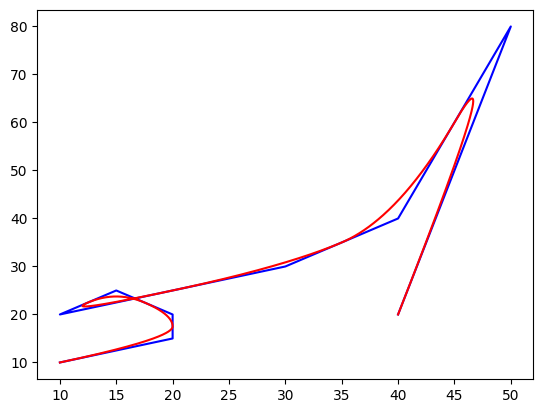

In [49]:
# Forme Complexe ouverte (k=3, vecteur uniforme)
points_control = np.array([(10,10), (20,15), (20,20), (15,25), (10,20), (30,30), (40,40), (50,80), (40,20)])

b_spline_points = b_spline(points_control, order = 3, nodal_vector_type="open_uniform")
draw_b_spline(points_control, b_spline_points)